In [5]:
'''
1. Introduction as SVM

   We will use SVM to build and train a model using human cell records , and classify cells to whether the samples 
   are beningn (mild state) or malignant(evil state).
   
   SVM works by mapping data to a high dimensional feature space so that data points can be categorized, even when
   the data are not otherwise linearly seperable (This gets done by the kernel function of the SVM classifer). 
   A seperator between the categories is found, then the data is transformed in such as way that the seperator could
   be drawn as a hyperplane.

2. Necessary Imports
   
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt

3. About the Cancer Data
   
   Each record contains the values of a set of cell characterstics. The fields in each records are: 
    
   Field Name                Description
   ID:                       Clump Thickness
   Clump:                    Clump Thickness
   UnifSize:                 Uniformity of Cell size
   UnifShape:                Uniformity of cell shape
   MargAdh:                  Marginal adhesion
   SingEpiSize:              Single spithelial cell size
   BareNuc:                  Bare nuclei
   BlandChrom:               Bland Chromatin
   NormNucl:                 Normal Nucleoli
   Mit:                      Mitoses
   Class:                    Benign or malignant
   
   #row = record
   #column = attribute/dimension
   #target = prediction

4. Load Data from the CSV file.
   
   pd.read_csv("")
   read_csv is available in the pandas library.
    
5. Distribution of classes

   In order to plot a scatter graph, we need 2 values. 1 to be plotted along x-axis and 1 along y-axis.
   Lets choose any 2 values from the dataset. Here we choose, clump and uniformity of cellsize.
   
   Out of the cell dataframe, we will choose those rows that belong to malignant class only.
   
    
6. Selection of unwanted columns
7. Remove unwanted columns
8. Divide the data as Train/Test dataset.
9. Modeling (SVM with scikit-learn)
10. Evaluation(results)
'''

'\n1. Necessary Imports\n2. About the Cancer Data\n3. Load Data from the CSV file.\n4. Distribution of classes\n6. Selection of unwanted columns\n7. Remove unwanted columns\n8. Divide the data as Train/Test dataset.\n9. Modeling (SVM with scikit-learn)\n10. Evaluation(results)\n'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
cell_df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [14]:
cell_df.shape

(699, 11)

In [15]:
cell_df.head

<bound method NDFrame.head of           ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025      5         1          1        1            2       1   
1    1002945      5         4          4        5            7      10   
2    1015425      3         1          1        1            2       2   
3    1016277      6         8          8        1            3       4   
4    1017023      4         1          1        3            2       1   
..       ...    ...       ...        ...      ...          ...     ...   
694   776715      3         1          1        1            3       2   
695   841769      2         1          1        1            2       1   
696   888820      5        10         10        3            7       3   
697   897471      4         8          6        4            3       4   
698   897471      4         8          8        5            4       5   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      2  
1

In [16]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [17]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [18]:
#Distribution

<Axes: xlabel='Clump', ylabel='UnifSize'>

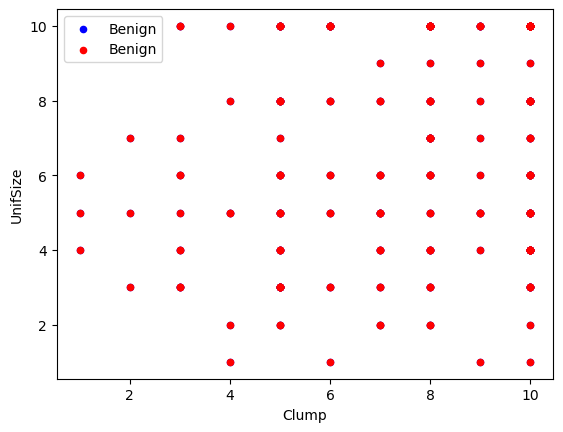

In [25]:
#Here what we did is , we only asked for rows that has a class attribute of 4. And we displayed only first 200 rows.
malignant_df=cell_df[cell_df['Class']==4][0:200]

#Here what we did is , we only asked for rows that has a class attribute of 2. And we displayed only first 200 rows. 
benign_df=cell_df[cell_df['Class']==4][0:200]

#malignant_df,benign_df are the name of classes.
#help(benign_df,plot) - - > to seek help

axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Benign', ax=axes)

#axes is the return we receive from teh previous command. ax is the parameter name.
#if you remove ax=axes from malignant_df , both graphs would be plotted seperately.
#labels means we are specifying the legends/labels we are specifying at the top right corner of the graph.

In [26]:
#identifying unwanted rows
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [27]:
'''Here, BareNuc has datatype is object. So, we cannot perform numeric operations onto it. For that, we need to 
   perform some modification onto it. 
   
   For all the rows where the values is non-numeric or missing we have to choose we can do. We can put a mean value of that at
   that position where the value is missing or non-numeric. Or, we can find other suitable values and placing it 
   there. Like; there is mean-max technique where you find the mean of the values and place it there. or Oversampling
   etc.

'''

'Here, BareNuc has datatype is object. So, we cannot perform numeric operations onto it. For that, we need to \n   perform some modification onto it. \n   \n   For all the rows where the values is non-numeric we have to choose we can do. We can put a mean value of that at\n   that position where the value is missing or non-numeric. Or, we can find other suitable values and placing it \n   there. Like; there is mean-max technique where you find the mean of the values and place it there. Oversampling\n   etc.\n\n'

In [28]:
#6. Identifying unwanted rows

"""
    Here if the values in a row are non-numeric, we will simply discard that row. It is upto you what to do.
"""

In [33]:
##converting the object data type to numeric datatype.
pd.to_numeric(cell_df['BareNuc'],errors='coerce')

##I would only choose those rows where it couldnot convert into numeric by calling another method called notnull.
#It only picks up rows where the column value is available.

cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]

#this converts the BareNuc column to int.
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [34]:
#Remove unwanted Columns
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [39]:
#We are trying to make a independent variable where the variables itself is a dataframe.
#Here, we filter out 2 columns id and class.

feature_df= cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit',]]

#We will now convert into numpy non-dimensional array. We are doing this to pass it as argument to our next function.
#We can pass it as a dataframe also or numpy nd-array in test-train method.

#cell_df 100 rows and 11 colums
#picked 9 columns out of 11

#independent variable
x= np.asarray(feature_df)

#dependent variable
y=np.asarray(cell_df['Class'])



In [40]:
x[0:5]  #printing first 5 elements.
#here, it is showing the first 5 elements where each element itself is an array.

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [41]:
#8 Dividing the entire data as training part and testing part.

'''
cell_df (100 rows) - - > Train(80 rows)/Test(20 rows) 
Train and Test have 2 components x and y respectively. Here, x itself is a 2D array and y is 1D array.
x is the column with independent variable and y is the column we are going to predict.
Train(x,y)
Test(x,y)
'''


'\ncell_df - - > Train/Test\nTrain and Test have 2 components x and y respectively. Here, x itself is a 2D array and y is 1D array.\nTrain(x,y)\nTest(x,y)\n'

In [55]:
#This method is available in sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

#random_state accepts values as seed values. Seed values are the values used to generate other random numbers.
#Those random generated by this seed value would be used to identify which all rows has to be chosen to palce them
#as a part of training set/data and rest will be considered as test data.
#test_sixe indicates the amount of data that should be use for testing. In this case we use 0.2 (20%) for testing 
#and 80& for training.
#We set the random_state for reproducibility. By inserting random_state , the random splitiing of this data will be consistent resulting in consistency in results.
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=4)

In [57]:
#They are asigned values X_train,X_test,y_train,y_test for the 4 arrays they give.
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(137,)

In [58]:
#9 Modelling(SVM=scikit-learn)
'''
Modelling is done by using SVM . It is imported by using scikit package. 

'''
from sklearn import svm

In [59]:
'''SVM package has multiple methods. One of them is SVC (support vector classifer).
Support vector classifiers refers to the data points near to the hyperplane whose distance perpendicular to the
hyperplane . If we sum all the points near the hyperplane and if that sum is maximum respective to other datapoints, 
such data points would be called as support vectors or support vector classifiers.

kernel is used for converting low dimensional feature space into high dimensional feature space. The mathematical 
function used for the transformation as called functions. The different types are:

1.linear
2.Polynomial
3.Radial Basis Function (RBF)
4.Sigmoid

Each of these functions have its charactersitics, its pros and cons, and its equation, but as there's not easy way 
of knowing which function performs the best with any dataset, we usually choose different functions in turn and 
compare results. lets just use the default, RBF (Radial Basis Function) for this instance.


'''


"SVM package has multiple methods. One of them is SVC (support vector classifer).\nSupport vector classifiers refers to the data points near to the hyperplane whose distance perpendicular to the\nhyperplane . If we sum all the points near the hyperplane and if that sum is maximum respective to other datapoints, \nsuch data points would be called as support vectors or support vector classifiers.\n\nkernel is used for converting low dimensional feature space into high dimensional feature space. The mathematical \nfunction used for the transformation as called functions. The different types are:\n\n1.linear\n2.Polynomial\n3.Radial Basis Function (RBF)\n4.Sigmoid\n\nEach of these functions have its charactersitics, its pros and cons, and its equation, but as there's not easy way \nof knowing which function performs the best with any dataset, we usually choose different functions in turn and \ncompare results. lets just use the default, RBF (Radial Basis Function) for this instance.\n\n\n"

In [65]:
#
'''C denotes the penalty we want to impose on the incorrectly placed datapoints wrt new hyperplane. If a object should 
placed in class A but is placed in class B then it is incorrectly placed according to the hyperplane. Such incorrect
datapoints would impose penalty called C. If we place C=2, then it means we imposed 2 units of penalty on such datapoints.
'''
classifier= svm.SVC(kernel='linear', gamma='auto',C=2)

'''
.fit . Based on patterns of data along X and Y, it prepares a model. We take capital X as it represents 2D data and y represents 1D data.
'''
classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [62]:
#The SVM model is build with all the respective values.

In [69]:
y_predict=classifier.predict(X_test)
"""
y_predict denotes the actual values of classes of each of the record available in X_test and y_test is the classes
predicted by our system.
"""

In [74]:
#10 Evaluation
''' 
There many in-built functions for evaluation. These is a function called classification_report to know how good
the classifier is. We insert X-test ; the actual values and y-test; the predicted values.
There is a package called sklearn.metrics for importing such packages.
'''

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [ ]:
"""
It says the precision is 100% for one class and is 90% for the other class. (true prediction/false prediction)
We understand using a confusion matrix.
In confusion matrix, out of all the positive we calculate all the true positive values and false positive values.

F1-score is the harmonical mean of precision vs recall.

F1= 2 x Precision * Recall
        ------------------
        Precision + Recall
        
Support:
It means how many instances of class 2(-ve) and class 4(+ve) were there.
"""